In [1]:
%matplotlib inline 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from adjustText import adjust_text

In [2]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

In [3]:
df = pd.read_excel('Reader Pronouns.xlsx', nrows=24, usecols='A:N')

In [4]:
plural_cols = df.columns[6:12]

In [5]:
df_agg = df.copy()

In [6]:
df_agg = df_agg.drop([4, 20])

In [7]:
for col in plural_cols:
    df_split = df_agg[col].str.extract('-(h\wm)(\w)?').fillna('o').rename({0: f'{col}_ha', 1: f'{col}_mim'}, axis=1)
    df_agg = pd.concat([df_agg, df_split], axis=1)

In [8]:
df_agg = df_agg.drop(plural_cols, axis=1)

In [9]:
df_agg = df_agg.T.drop_duplicates().T

In [10]:
df_feats = pd.get_dummies(df_agg, columns=df_agg.columns[2:], drop_first=False)

In [11]:
labeler = LabelEncoder()
city_labels = labeler.fit_transform(df_feats['City'].fillna('unknown'))

In [12]:
noise = np.random.normal(loc=0, scale=0.02, size=df_feats.iloc[:,2:].shape)

In [13]:
pca = PCA(n_components=2)
X = pca.fit_transform(df_feats.iloc[:, 2:] + noise)
X[:,1] *= -1

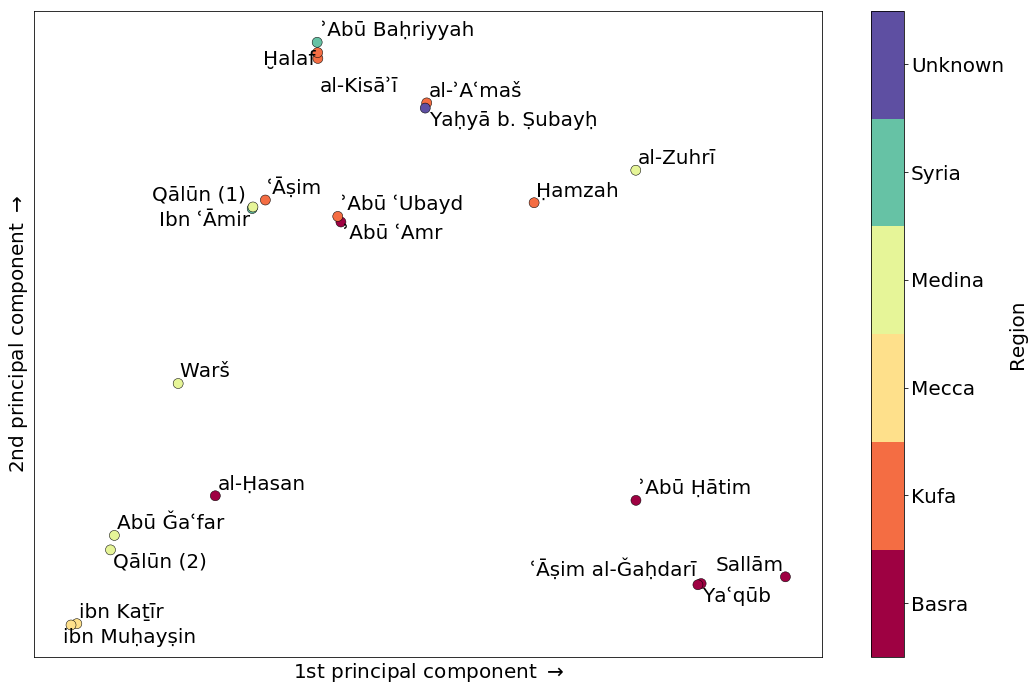

In [14]:
plt.rcParams['font.size'] = 20
plt.figure(figsize=(15, 10))
plt.scatter(*X.T, c=city_labels, cmap=discrete_cmap(6, 'Spectral'), s=100, vmin=0, vmax=6, edgecolor='black', linewidths=0.5)
cbar = plt.colorbar()
cbar.set_ticks(np.arange(6)+0.5)
cbar.set_ticklabels(labeler.classes_)
cbar.set_label('Region')
plt.xlabel(r'1st principal component $\rightarrow$')
plt.ylabel(r'2nd principal component $\rightarrow$')
plt.xticks([])
plt.yticks([])

texts = [plt.text(x, y, q, ha='center', va='center') for q, (x,y) in zip(df_feats['Reader'], X)]
adjust_text(texts)

plt.tight_layout()
plt.savefig('reader_pca.png', dpi=300, transparent=True)